# K Nearest Neighbors project

Welcome to the KNN Project! This will be a simple project very similar to the lecture, except you'll be given another data set. Go ahead and just follow the directions below

In [118]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn.objects as so
import seaborn as sns
%matplotlib inline

In [119]:
# load the dataset
df=pd.read_csv("KNN_Project_Data.csv")
df

XVPM         GWYH         TRAT        TLLZ         IGGA  \
0    1636.670614   817.988525  2565.995189  358.347163   550.417491   
1    1013.402760   577.587332  2644.141273  280.428203  1161.873391   
2    1300.035501   820.518697  2025.854469  525.562292   922.206261   
3    1059.347542  1066.866418   612.000041  480.827789   419.467495   
4    1018.340526  1313.679056   950.622661  724.742174   843.065903   
..           ...          ...          ...         ...          ...   
995  1343.060600  1289.142057   407.307449  567.564764  1000.953905   
996   938.847057  1142.884331  2096.064295  483.242220   522.755771   
997   921.994822   607.996901  2065.482529  497.107790   457.430427   
998  1157.069348   602.749160  1548.809995  646.809528  1335.737820   
999  1287.150025  1303.600085  2247.287535  664.362479  1132.682562   

            HYKR         EDFS        GUUB         MGJM         JHZC  \
0    1618.870897  2147.641254  330.727893  1494.878631   845.136088   
1    2084.107872   853.404981  447.157619  1193.032521   861.081809   
2    2552.355407   818.676686  845.491492  1968.367513  1647.186291   
3     685.666983   852.867810  341.664784  1154.391368  1450.935357   
4    1370.554164   905.469453  658.118202   539.459350  1899.850792   
..           ...          ...         ...          ...          ...   
995   919.602401   485.269059  668.007397  1124.772996  2127.628290   
996  1703.169782  2007.548635  533.514816   379.264597   567.200545   
997  1577.506205  1659.197738  186.854577   978.340107  1943.304912   
998  1455.504390  2788.366441  552.388107  1264.818079  1331.879020   
999   991.774941  2007.676371  251.916948   846.167511   952.895751   

     TARGET CLASS  
0               0  
1               1  
2               1  
3               0  
4               0  
..            ...  
995             0  
996             1  
997             1  
998             1  
999             1  

[1000 rows x 11 columns]

In [120]:
df.shape

(1000, 11)

total 11 feature & 1000 data in the dataset

In [121]:
df.isnull()

XVPM   GWYH   TRAT   TLLZ   IGGA   HYKR   EDFS   GUUB   MGJM   JHZC  \
0    False  False  False  False  False  False  False  False  False  False   
1    False  False  False  False  False  False  False  False  False  False   
2    False  False  False  False  False  False  False  False  False  False   
3    False  False  False  False  False  False  False  False  False  False   
4    False  False  False  False  False  False  False  False  False  False   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
995  False  False  False  False  False  False  False  False  False  False   
996  False  False  False  False  False  False  False  False  False  False   
997  False  False  False  False  False  False  False  False  False  False   
998  False  False  False  False  False  False  False  False  False  False   
999  False  False  False  False  False  False  False  False  False  False   

     TARGET CLASS  
0           False  
1           False  
2           False  
3           False  
4           False  
..            ...  
995         False  
996         False  
997         False  
998         False  
999         False  

[1000 rows x 11 columns]

It seems there dont have any 

In [122]:
df.isnull().sum()

XVPM            0
GWYH            0
TRAT            0
TLLZ            0
IGGA            0
HYKR            0
EDFS            0
GUUB            0
MGJM            0
JHZC            0
TARGET CLASS    0
dtype: int64

In [123]:
df.isnull().all()

XVPM            False
GWYH            False
TRAT            False
TLLZ            False
IGGA            False
HYKR            False
EDFS            False
GUUB            False
MGJM            False
JHZC            False
TARGET CLASS    False
dtype: bool

There dont have any null in the dataset

In [124]:
df.head(10)

XVPM         GWYH         TRAT        TLLZ         IGGA  \
0  1636.670614   817.988525  2565.995189  358.347163   550.417491   
1  1013.402760   577.587332  2644.141273  280.428203  1161.873391   
2  1300.035501   820.518697  2025.854469  525.562292   922.206261   
3  1059.347542  1066.866418   612.000041  480.827789   419.467495   
4  1018.340526  1313.679056   950.622661  724.742174   843.065903   
5  1587.993461   667.420121  2072.048544  364.624958   905.011385   
6  1497.293624   822.435853   908.059366  671.797517  1280.270442   
7  1172.820769  1166.958461   455.656588  445.572745  1109.894585   
8   839.494647  1089.747059   653.699894  659.334590  1529.725972   
9  1028.689140   202.089774  1030.841860  429.109102   943.104815   

          HYKR         EDFS        GUUB         MGJM         JHZC  \
0  1618.870897  2147.641254  330.727893  1494.878631   845.136088   
1  2084.107872   853.404981  447.157619  1193.032521   861.081809   
2  2552.355407   818.676686  845.491492  1968.367513  1647.186291   
3   685.666983   852.867810  341.664784  1154.391368  1450.935357   
4  1370.554164   905.469453  658.118202   539.459350  1899.850792   
5  2229.178514   880.442566  568.698408   645.719217  2156.949990   
6  1910.066313  1052.812386  713.757499   703.951632  1088.493788   
7  1045.551452  1301.821786  264.940137   945.023932  2307.922229   
8  1521.320489  1401.676227  433.025043  1289.063583  1690.149835   
9  1978.506855   653.178512  753.655291  1336.375960  1057.864848   

   TARGET CLASS  
0             0  
1             1  
2             1  
3             0  
4             0  
5             1  
6             0  
7             0  
8             0  
9             1

In [125]:
df.tail(5)

XVPM         GWYH         TRAT        TLLZ         IGGA  \
995  1343.060600  1289.142057   407.307449  567.564764  1000.953905   
996   938.847057  1142.884331  2096.064295  483.242220   522.755771   
997   921.994822   607.996901  2065.482529  497.107790   457.430427   
998  1157.069348   602.749160  1548.809995  646.809528  1335.737820   
999  1287.150025  1303.600085  2247.287535  664.362479  1132.682562   

            HYKR         EDFS        GUUB         MGJM         JHZC  \
995   919.602401   485.269059  668.007397  1124.772996  2127.628290   
996  1703.169782  2007.548635  533.514816   379.264597   567.200545   
997  1577.506205  1659.197738  186.854577   978.340107  1943.304912   
998  1455.504390  2788.366441  552.388107  1264.818079  1331.879020   
999   991.774941  2007.676371  251.916948   846.167511   952.895751   

     TARGET CLASS  
995             0  
996             1  
997             1  
998             1  
999             1

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   XVPM          1000 non-null   float64
 1   GWYH          1000 non-null   float64
 2   TRAT          1000 non-null   float64
 3   TLLZ          1000 non-null   float64
 4   IGGA          1000 non-null   float64
 5   HYKR          1000 non-null   float64
 6   EDFS          1000 non-null   float64
 7   GUUB          1000 non-null   float64
 8   MGJM          1000 non-null   float64
 9   JHZC          1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 86.1 KB


Documentation feture are one datatype . Target feature had integer value

In [127]:
df.describe()

XVPM         GWYH         TRAT         TLLZ         IGGA  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean   1055.071157   991.851567  1529.373525   495.107156   940.590072   
std     370.980193   392.278890   640.286092   142.789188   345.923136   
min      21.170000    21.720000    31.800000     8.450000    17.930000   
25%     767.413366   694.859326  1062.600806   401.788135   700.763295   
50%    1045.904805   978.355081  1522.507269   500.197421   939.348662   
75%    1326.065178  1275.528770  1991.128626   600.525709  1182.578166   
max    2117.000000  2172.000000  3180.000000   845.000000  1793.000000   

              HYKR         EDFS         GUUB         MGJM         JHZC  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean   1550.637455  1561.003252   561.346117  1089.067338  1452.521629   
std     493.491988   598.608517   247.357552   402.666953   568.132005   
min      27.930000    31.960000    13.520000    23.210000    30.890000   
25%    1219.267077  1132.097865   381.704293   801.849802  1059.499689   
50%    1564.996551  1565.882879   540.420379  1099.087954  1441.554053   
75%    1891.937040  1981.739411   725.762027  1369.923665  1864.405512   
max    2793.000000  3196.000000  1352.000000  2321.000000  3089.000000   

       TARGET CLASS  
count    1000.00000  
mean        0.50000  
std         0.50025  
min         0.00000  
25%         0.00000  
50%         0.50000  
75%         1.00000  
max         1.00000

In [128]:
df['TARGET CLASS'].value_counts()

0    500
1    500
Name: TARGET CLASS, dtype: int64

Half of the dataset are 0 left are 1

Describe the outline of dataset

## Exploratory Data Analysis

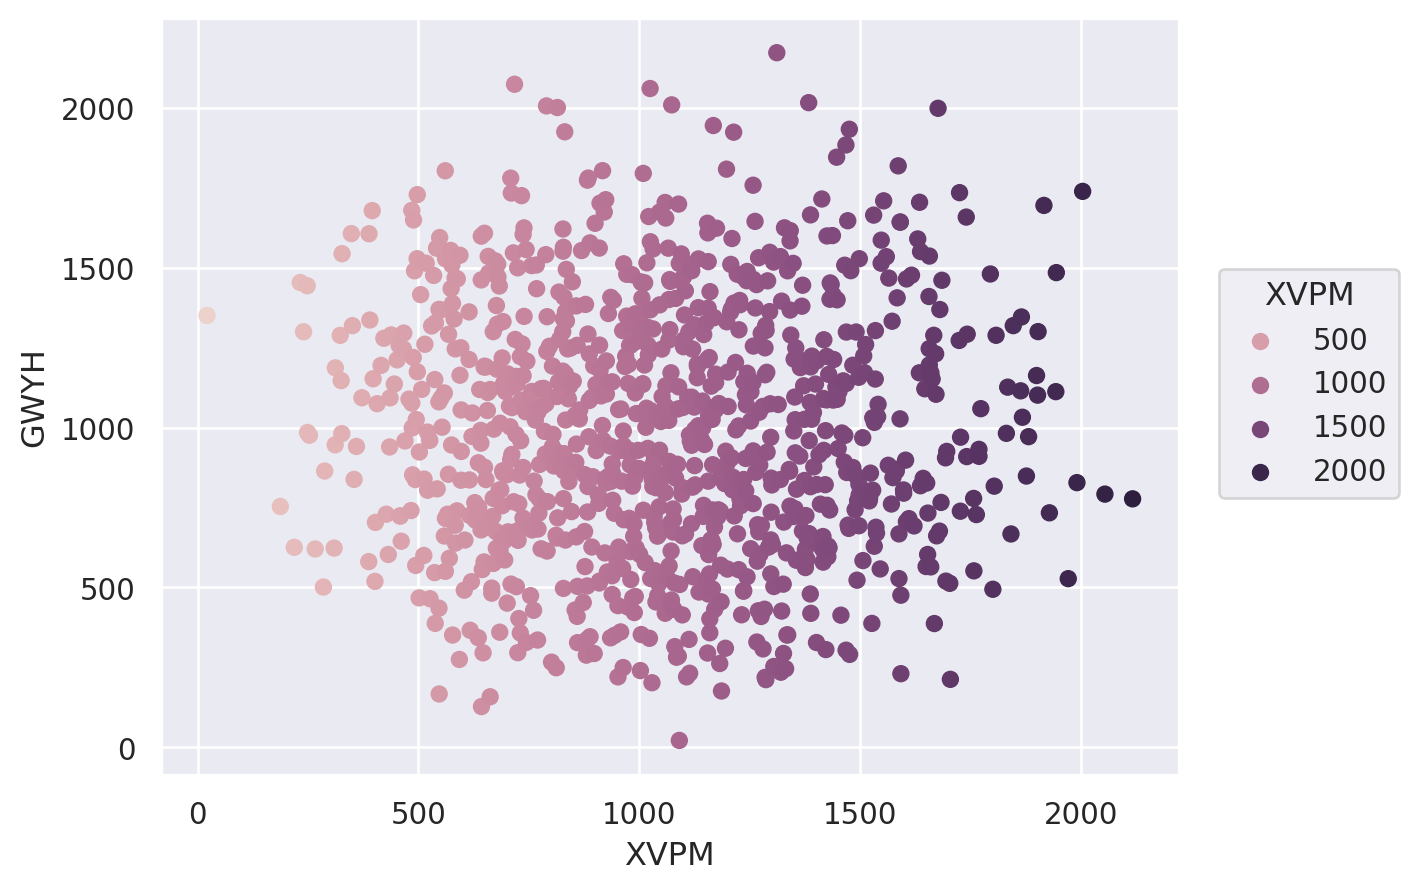

In [129]:
(
    so.Plot(df,x='XVPM',y='GWYH',color='XVPM')
    .add(so.Dot(),so.Agg())
)

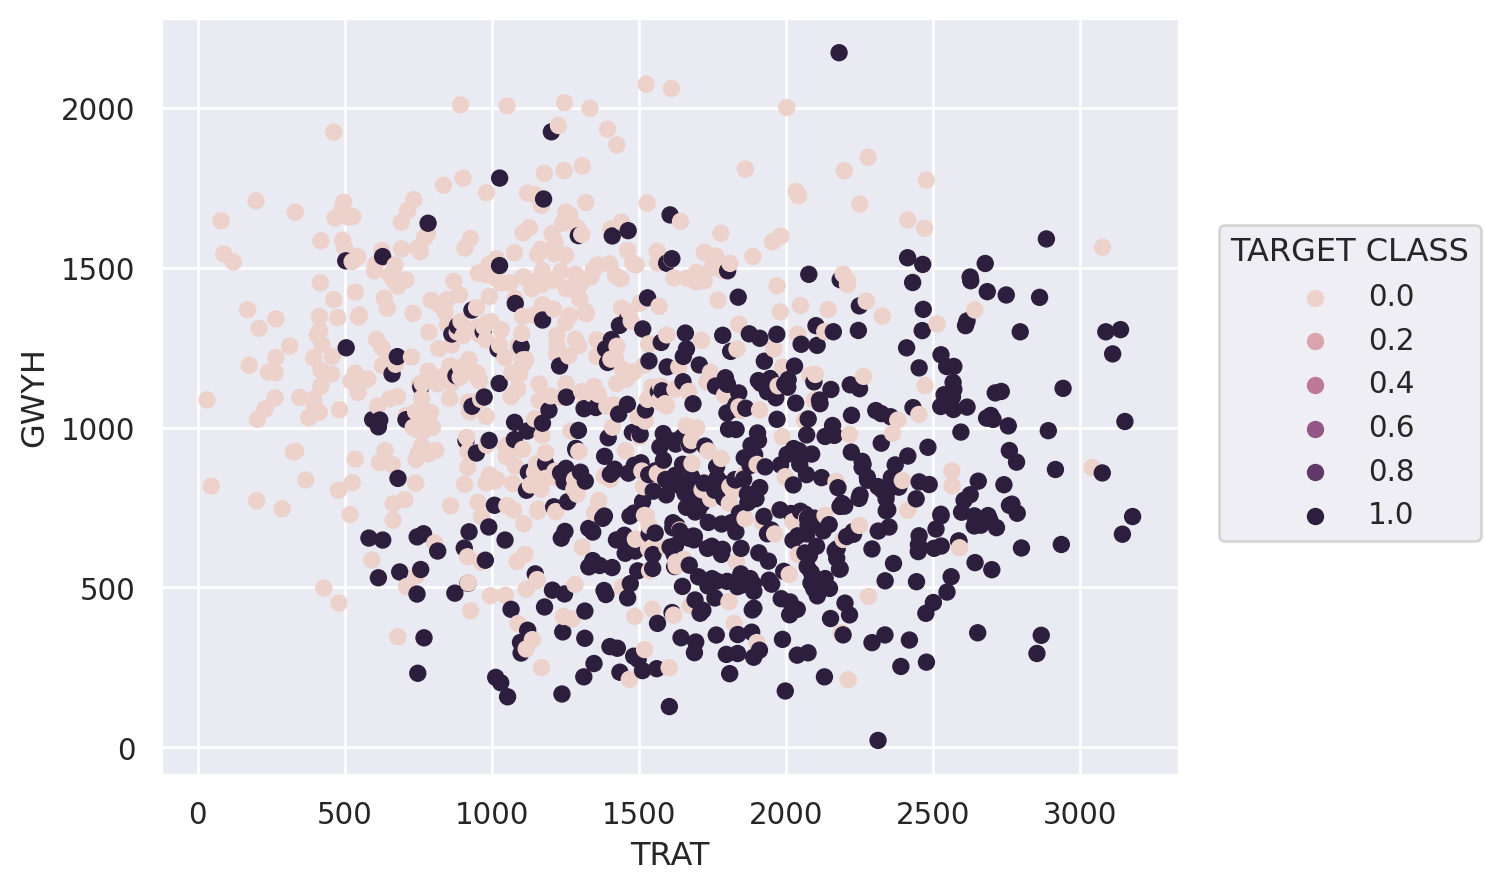

In [130]:
(
    so.Plot(df,x='TRAT',y='GWYH',color='TARGET CLASS')
    .add(so.Dot(),so.Agg())
)

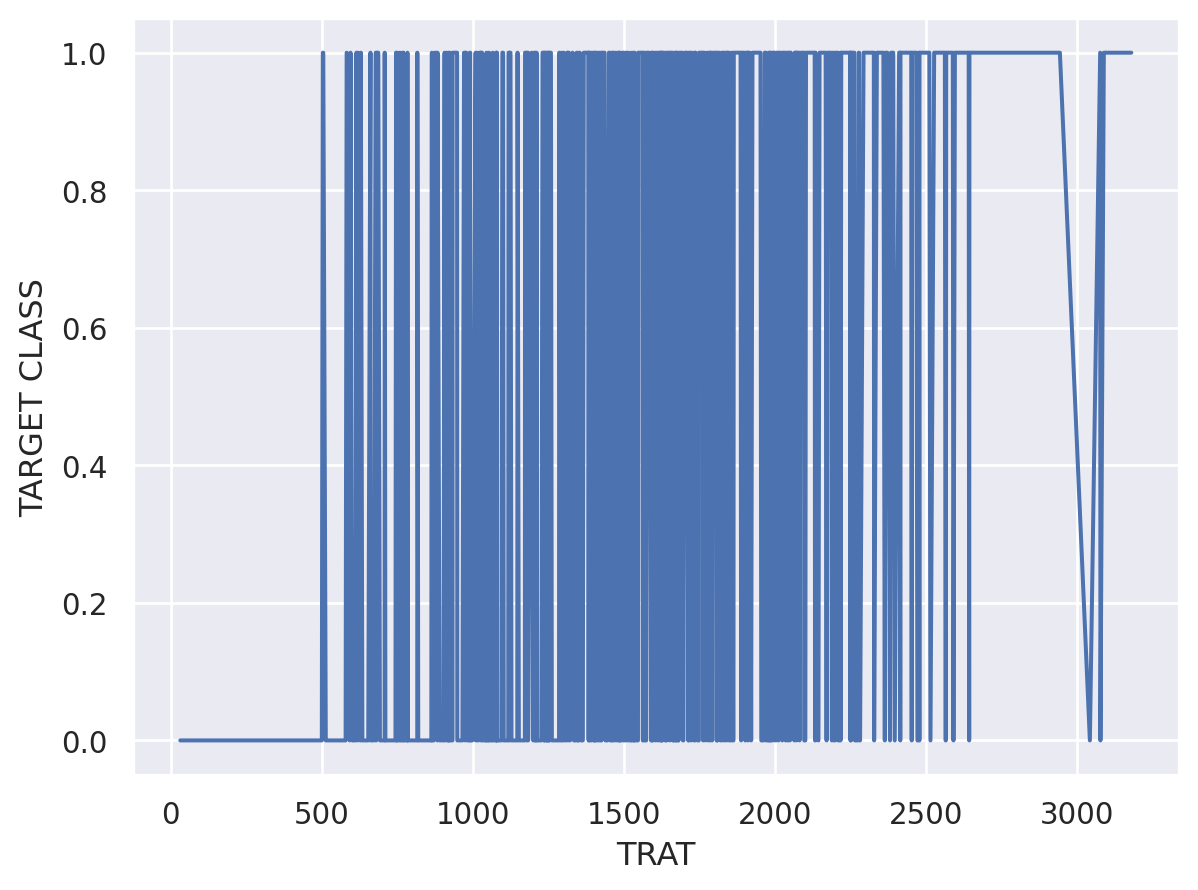

In [131]:
(
    so.Plot(df,x='TRAT',y='TARGET CLASS')
    .add(so.Line())
)

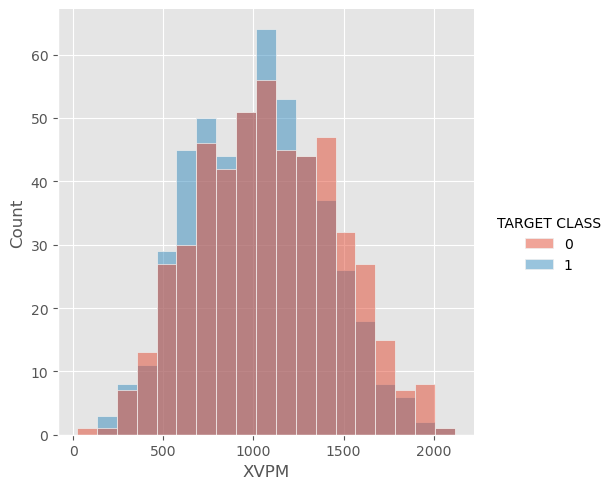

In [132]:
# distribution plot
sns.displot(df,x='XVPM',hue='TARGET CLASS')
plt.show()

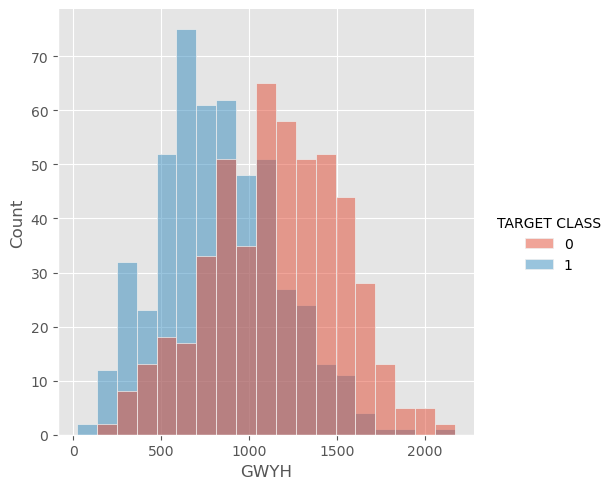

In [133]:
sns.displot(df,x='GWYH',hue='TARGET CLASS')
plt.show()

In [134]:
df.head(1)

XVPM        GWYH         TRAT        TLLZ        IGGA         HYKR  \
0  1636.670614  817.988525  2565.995189  358.347163  550.417491  1618.870897   

          EDFS        GUUB         MGJM        JHZC  TARGET CLASS  
0  2147.641254  330.727893  1494.878631  845.136088             0

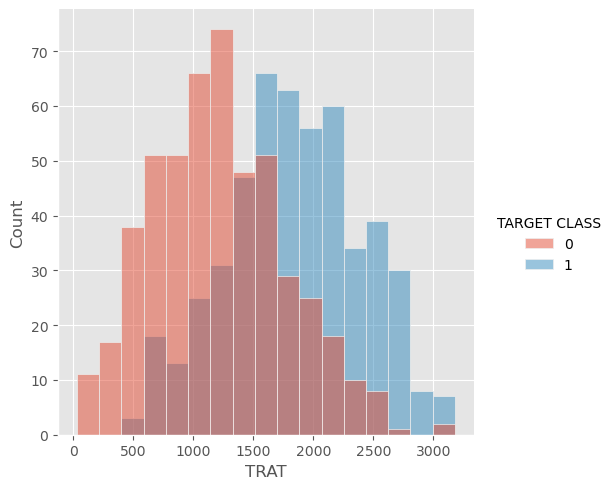

In [135]:
sns.displot(df,x='TRAT',hue='TARGET CLASS')
plt.show()

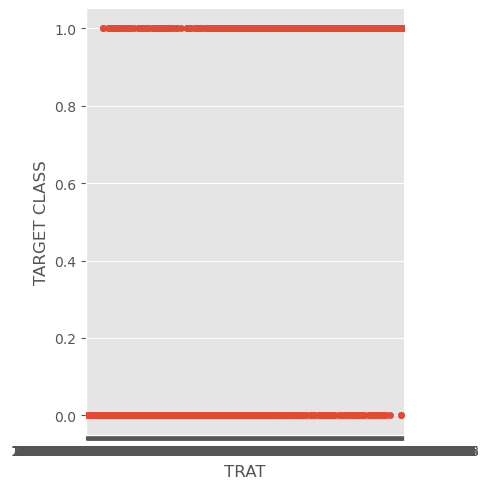

In [136]:
sns.catplot(df,x='TRAT',y='TARGET CLASS')

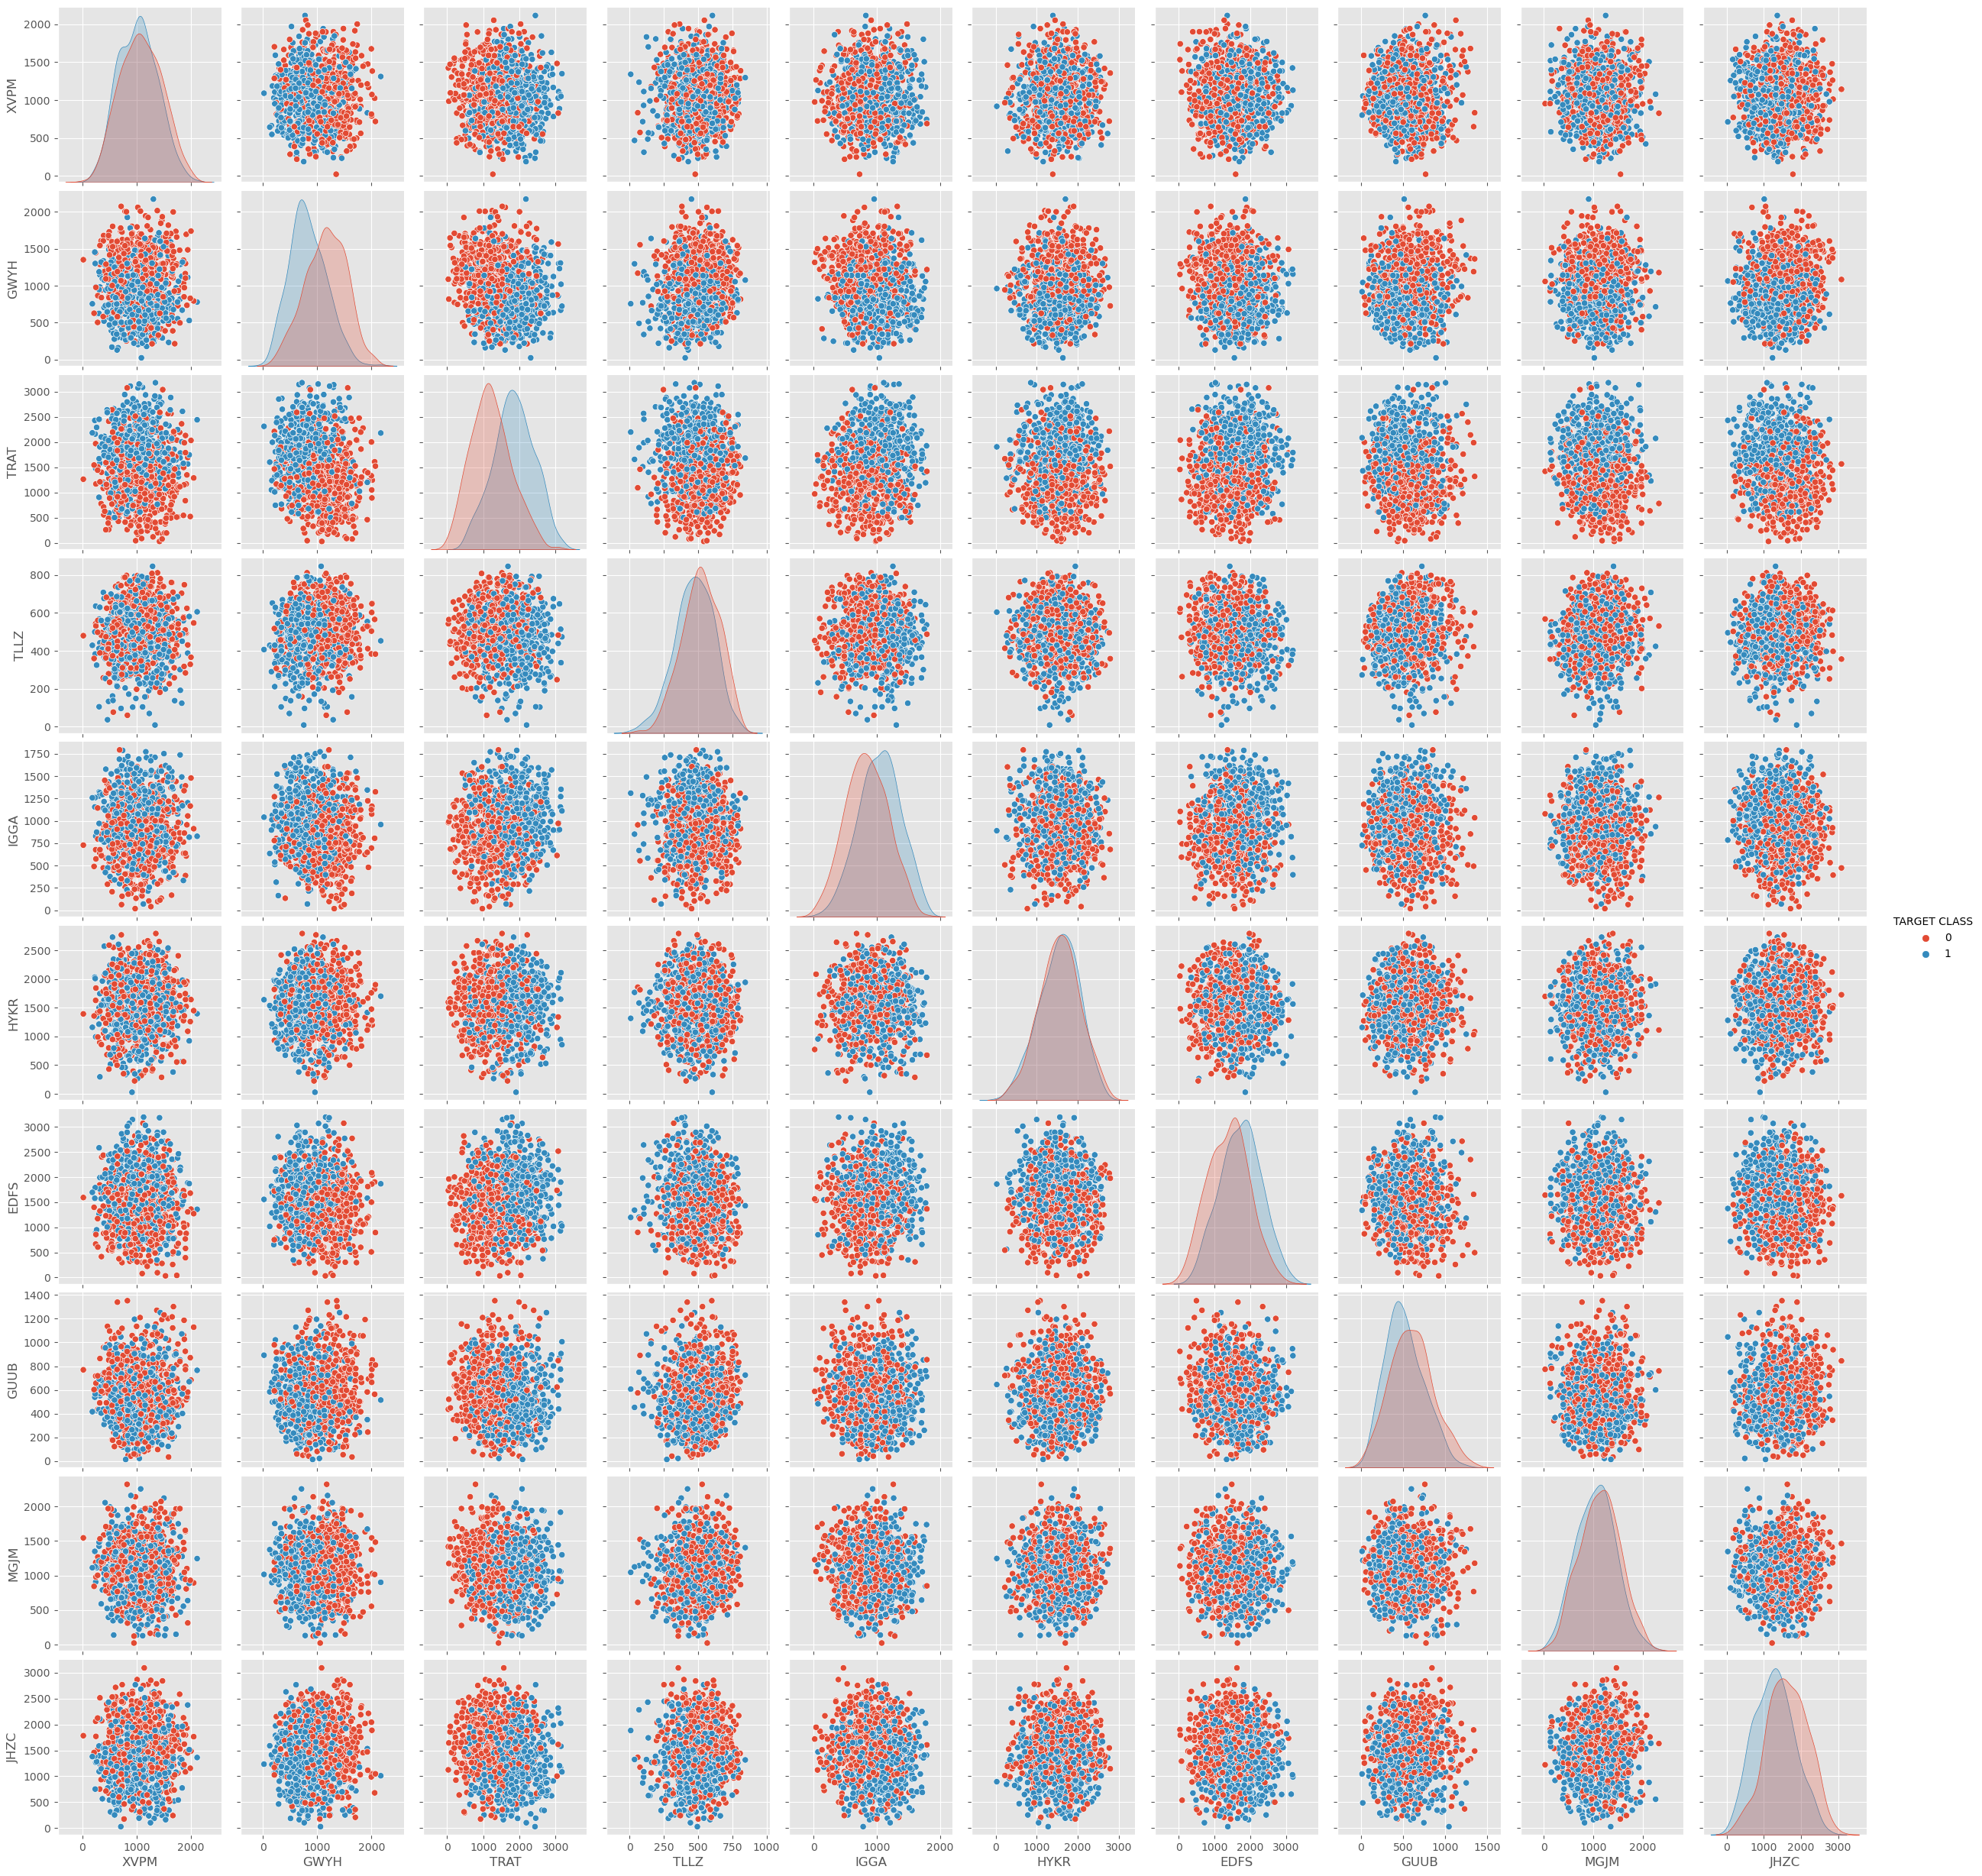

In [137]:
sns.pairplot(df,hue='TARGET CLASS')

## Standardize the Variables

In [138]:
from sklearn.preprocessing import StandardScaler

In [139]:
#create a object
myscaler=StandardScaler()

In [140]:
myscaler

StandardScaler()

In [141]:
#fit to feature

myscaler.fit(X = df.drop('TARGET CLASS', axis = 1))


StandardScaler()

Use the .transform() method to transform the features to a scaled version.

In [142]:
x = myscaler.transform(X = df.drop('TARGET CLASS', axis = 1))
y=df['TARGET CLASS']

Convert the scaled features to a dataframe and check the head of this dataframe to make sure the scaling worked.

In [143]:
tdf=pd.DataFrame(x,columns=df.columns[:-1])
tdf

XVPM      GWYH      TRAT      TLLZ      IGGA      HYKR      EDFS  \
0    1.568522 -0.443435  1.619808 -0.958255 -1.128481  0.138336  0.980493   
1   -0.112376 -1.056574  1.741918 -1.504220  0.640009  1.081552 -1.182663   
2    0.660647 -0.436981  0.775793  0.213394 -0.053171  2.030872 -1.240707   
3    0.011533  0.191324 -1.433473 -0.100053 -1.507223 -1.753632 -1.183561   
4   -0.099059  0.820815 -0.904346  1.609015 -0.282065 -0.365099 -1.095644   
..        ...       ...       ...       ...       ...       ...       ...   
995  0.776682  0.758234 -1.753322  0.507699  0.174588 -1.279354 -1.797957   
996 -0.313446  0.385206  0.885502 -0.083136 -1.208486  0.309242  0.746346   
997 -0.358895 -0.979015  0.837715  0.014018 -1.397424  0.054473  0.164120   
998  0.275080 -0.992399  0.030371  1.062954  1.142871 -0.192872  2.051386   
999  0.625896  0.795109  1.121800  1.185944  0.555582 -1.133032  0.746559   

         GUUB      MGJM      JHZC  
0   -0.932794  1.008313 -1.069627  
1   -0.461864  0.258321 -1.041546  
2    1.149298  2.184784  0.342811  
3   -0.888557  0.162310 -0.002793  
4    0.391419 -1.365603  0.787762  
..        ...       ...       ...  
995  0.431419  0.088717  1.188886  
996 -0.112571 -1.763636 -1.559081  
997 -1.514726 -0.275122  0.864287  
998 -0.036233  0.436685 -0.212456  
999 -1.251565 -0.603529 -0.879859  

[1000 rows x 10 columns]

In [144]:
tdf.shape

(1000, 10)

## train test split

In [145]:
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV

In [146]:
print(x)
print(y)

[[ 1.56852168 -0.44343461  1.61980773 ... -0.93279392  1.00831307
  -1.06962723]
 [-0.11237594 -1.05657361  1.7419175  ... -0.46186435  0.25832069
  -1.04154625]
 [ 0.66064691 -0.43698145  0.77579285 ...  1.14929806  2.1847836
   0.34281129]
 ...
 [-0.35889496 -0.97901454  0.83771499 ... -1.51472604 -0.27512225
   0.86428656]
 [ 0.27507999 -0.99239881  0.0303711  ... -0.03623294  0.43668516
  -0.21245586]
 [ 0.62589594  0.79510909  1.12180047 ... -1.25156478 -0.60352946
  -0.87985868]]
0      0
1      1
2      1
3      0
4      0
      ..
995    0
996    1
997    1
998    1
999    1
Name: TARGET CLASS, Length: 1000, dtype: int64


In [147]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)

In [148]:
print("X_train Shape :",X_train.shape)
print("X_test Shape  :",X_test.shape)
print("y_train Shape :",y_train.shape)
print("y_test Shape  :",y_test.shape)

X_train Shape : (700, 10)
X_test Shape  : (300, 10)
y_train Shape : (700,)
y_test Shape  : (300,)


## Apply Machine Learning Algo : KNN

In [149]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [150]:
knn=KNeighborsClassifier()

### Hyperparameter Tuning

In [151]:
parameter= {
    'n_neighbors':[4,6,7,8],
    'weights':['uniform','distance'],
    'p':[1,2,3],
    'leaf_size':[10,20,30,40]
}


In [152]:
grid=GridSearchCV(knn,parameter)
grid.fit(X_train,y_train)
grid.best_params_

{'leaf_size': 10, 'n_neighbors': 8, 'p': 1, 'weights': 'distance'}

RandiomizedSearchCV

In [153]:
random=RandomizedSearchCV(knn,parameter)
random.fit(X_train,y_train)
random.best_params_

{'weights': 'distance', 'p': 1, 'n_neighbors': 8, 'leaf_size': 10}

In [154]:
knn=KNeighborsClassifier(p=3,weights='distance',n_neighbors=8,leaf_size=10,n_jobs=1)

In [155]:
## fit data
knn.fit(X_train,y_train)

KNeighborsClassifier(leaf_size=10, n_jobs=1, n_neighbors=8, p=3,
                     weights='distance')

## Predictions and Evaluations

In [156]:
y_predict_test = knn.predict(X_test)
y_predict_train=knn.predict(X_train)

Create a confusion matrix and classification report.

In [157]:
print("confusion matrix :")
print("test :\n",confusion_matrix(y_predict_test,y_test))
print("train :\n",confusion_matrix(y_predict_train,y_train))

confusion matrix :
test :
 [[122  28]
 [ 30 120]]
train :
 [[348   0]
 [  0 352]]


In [158]:
print("classification_report :")
print("Test")
print(classification_report(y_predict_test,y_test))
print("Train")
print(classification_report(y_predict_train,y_train))

classification_report :
Test
              precision    recall  f1-score   support

           0       0.80      0.81      0.81       150
           1       0.81      0.80      0.81       150

    accuracy                           0.81       300
   macro avg       0.81      0.81      0.81       300
weighted avg       0.81      0.81      0.81       300

Train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       348
           1       1.00      1.00      1.00       352

    accuracy                           1.00       700
   macro avg       1.00      1.00      1.00       700
weighted avg       1.00      1.00      1.00       700



Cheack accuracy score 

In [159]:
acc_test=accuracy_score(y_predict_test,y_test)
acc_train=accuracy_score(y_predict_train,y_train)
print("Accuracy for test  :",acc_test)
print("Accuracy for train :",acc_train)

Accuracy for test  : 0.8066666666666666
Accuracy for train : 1.0


### Choosing K value using loop

In [160]:
err_rates = []
for idx in range(1,50):
    knn = KNeighborsClassifier(n_neighbors = idx)
    knn.fit(X_train, y_train)
    pred_idx = knn.predict(X_test)
    err_rates.append(np.mean(y_test != pred_idx))
err_rates    

[0.28,
 0.29,
 0.21666666666666667,
 0.22,
 0.20666666666666667,
 0.21,
 0.18333333333333332,
 0.19,
 0.19,
 0.17666666666666667,
 0.18333333333333332,
 0.18333333333333332,
 0.18333333333333332,
 0.18,
 0.18,
 0.18,
 0.17,
 0.17333333333333334,
 0.17666666666666667,
 0.18333333333333332,
 0.17666666666666667,
 0.18333333333333332,
 0.16666666666666666,
 0.18,
 0.16666666666666666,
 0.17,
 0.16666666666666666,
 0.17333333333333334,
 0.16666666666666666,
 0.17333333333333334,
 0.16,
 0.16666666666666666,
 0.17333333333333334,
 0.17333333333333334,
 0.17,
 0.16666666666666666,
 0.16,
 0.16333333333333333,
 0.16,
 0.17,
 0.16666666666666666,
 0.16666666666666666,
 0.16333333333333333,
 0.17333333333333334,
 0.16666666666666666,
 0.16666666666666666,
 0.17,
 0.16666666666666666,
 0.17333333333333334]

Now create the following plot using the information from your for loop.


Text(0.5, 1.0, 'Error Rate vs K-value')

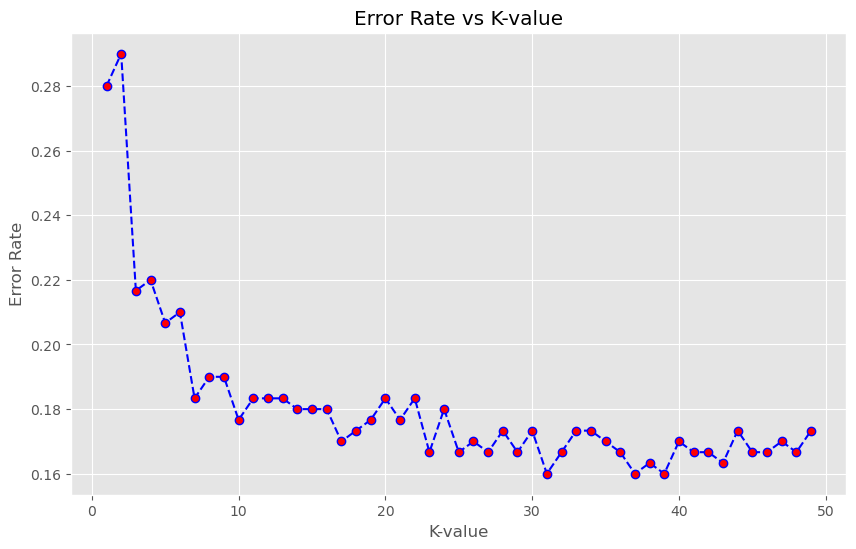

In [161]:
plt.style.use('ggplot')
plt.subplots(figsize = (10,6))
plt.plot(range(1,50), err_rates, linestyle = 'dashed', color = 'blue', marker = 'o', markerfacecolor = 'red')
plt.xlabel('K-value')
plt.ylabel('Error Rate')
plt.title('Error Rate vs K-value')

### Retrain with new K Value
Retrain your model with the best K value (up to you to decide what you want) and re-do the classification report and the confusion matrix.

In [162]:
myKNN = KNeighborsClassifier(n_neighbors = 31)
myKNN.fit(X_train,y_train)
y_predict = myKNN.predict(X_test)

print('WITH K=31')
print('')
print(confusion_matrix(y_test,y_predict))
print('')
print(classification_report(y_test,y_predict))

WITH K=31

[[123  29]
 [ 19 129]]

              precision    recall  f1-score   support

           0       0.87      0.81      0.84       152
           1       0.82      0.87      0.84       148

    accuracy                           0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300

